In [21]:
from IPython.display import Image
import PIL 
import os
import openslide
from openslide import open_slide
import pyvips
import numpy as np

os.chdir('data/mai_mini')

In [2]:
slide = pyvips.Image.openslideload('MAI_Mitosis_DE.Char.RK_Bio31_HE_DE.Char.Hama.XR.01_40x_01.ndpi', level=0)

In [15]:
slide.width, slide.height

(61440, 53760)

In [14]:
slide.get_fields()

[]

In [77]:
slide = slide.resize(k)
slide.width, slide.height

(55520, 48580)

In [78]:
slide.tiffsave('wsi2.tiff', compression='jpeg', Q=80, tile=True, tile_width=240, tile_height=240, pyramid=False)

In [53]:
slide1 = pyvips.Image.openslideload('wsi1_test.tiff', level=0)
slide1.width, slide1.height

(49799, 38704)

In [60]:
wsi1_test = open_slide('wsi1.tiff')

In [ ]:
wsi1_test.properties

In [ ]:
img = wsi1_test.read_region((40000, 30704), 0, (1000, 1000))#.save('wsi2.png')
img

In [65]:
img.size

(41799, 31704)

In [27]:
wsi1.properties

<_PropertyMap {'aperio.AppMag': '40', 'aperio.Date': '11/11/20', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '45', 'aperio.Filename': 'X', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'AT2', 'aperio.ImageID': '1113407', 'aperio.Left': '25.522470', 'aperio.LineAreaXOffset': '0.009413', 'aperio.LineAreaYOffset': '-0.011159', 'aperio.LineCameraSkew': '-0.000421', 'aperio.MPP': '0.2514', 'aperio.OriginalHeight': '38804', 'aperio.OriginalWidth': '50800', 'aperio.Parmset': 'Light Stained', 'aperio.ScanScope ID': 'SS7533', 'aperio.SessonMode': 'NR', 'aperio.StripeWidth': '2032', 'aperio.Time': '17:58:09', 'aperio.Time Zone': 'GMT+01:00', 'aperio.Top': '18.340612', 'aperio.User': '14bd3a2a-24cd-42d0-a8ca-5563d79c90d6', 'openslide.comment': 'Aperio Image Library v12.0.16 \r\n50800x38804 [0,100 49799x38704] (240x240) JPEG/RGB Q=80|AppMag = 40|StripeWidth = 2032|ScanScope ID = SS7533|Filename = X|Date = 11/11/20|Time = 17:58:09|Time Zone = 

In [26]:
wsi2.properties

<_PropertyMap {'hamamatsu.AHEX[0]': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[0].fluorescence': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[0].ploidy': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[1]': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[1].fluorescence': '0000000000000000000000000000000000000000000000

In [17]:
wsi1 = open_slide('MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01.svs')
# mpp1 = (float(wsi1.properties[openslide.PROPERTY_NAME_MPP_X])+float(wsi1.properties[openslide.PROPERTY_NAME_MPP_Y]))/2
mpp1 = float(wsi1.properties[openslide.PROPERTY_NAME_MPP_X])
print(wsi1.properties[openslide.PROPERTY_NAME_MPP_X], wsi1.properties[openslide.PROPERTY_NAME_MPP_Y])
print('Microns per pixel:', mpp1)

0.25140000000000001 0.25140000000000001
Microns per pixel: 0.2514


In [18]:
wsi2 = open_slide('MAI_Mitosis_DE.Char.RK_Bio31_HE_DE.Char.Hama.XR.01_40x_01.ndpi')
mpp2 = float(wsi2.properties[openslide.PROPERTY_NAME_MPP_X])
print(wsi2.properties[openslide.PROPERTY_NAME_MPP_X], wsi2.properties[openslide.PROPERTY_NAME_MPP_Y])
print('Microns per pixel:', mpp2)


0.22717462913741793 0.22717462913741793
Microns per pixel: 0.22717462913741793


In [4]:
print(wsi2.level_count, wsi2.level_dimensions[2])

10 (15360, 13440)


In [6]:
wsi2.read_region((0, 0), 0, wsi2.level_dimensions[0]).save('wsi2.png')

In [9]:
k = min(mpp1, mpp2)/max(mpp1, mpp2)
k

0.9036381429491563

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [24]:
l = 2
w, h = wsi1.level_dimensions[l]
print(wsi1.level_count, (w, h))
img = wsi1.read_region((0, 0), l, wsi1.level_dimensions[l]).resize((int(w/2), int(h/2)), PIL.Image.BILINEAR)#.save('wsi1.png')
# img

3 (3112, 2419)


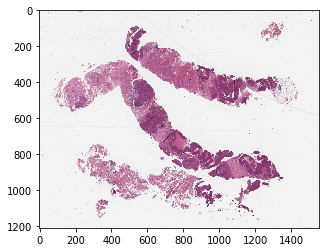

In [25]:
img = np.array(img.convert("RGB"))
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


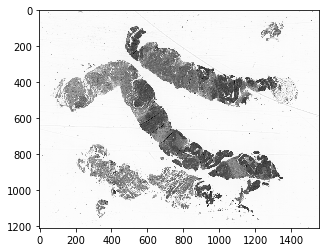

In [41]:
plt.imshow(img, cmap='gray')

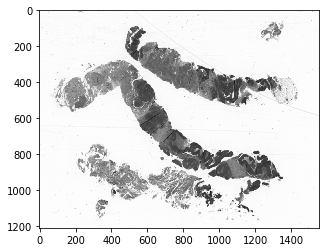

In [42]:
img = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img, cmap='gray')

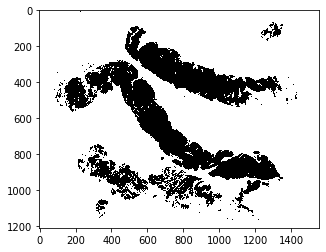

In [45]:
# mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)[1]
mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(mask, cmap='gray')

In [32]:
from openslide.deepzoom import DeepZoomGenerator

In [35]:
dz = DeepZoomGenerator(wsi1, tile_size=64, overlap=0)

In [49]:
256/16

16.0

In [3]:
!python3 pyhist.py --save-patches --output-downsample 1 --patch-size 128 --mask-downsample 16 --tilecross-downsample 16 --method "otsu" --info  "verbose" --save-tilecrossed-image --content-threshold 0.2 wsi2.tiff

05-02-2021 02:19:30 [CRITICAL]: Experimental support only for .tiff slides!
05-02-2021 02:21:13 [DEBUG]: Otsu thresholding will be performed with mask downsampling of 16x.
05-02-2021 02:21:13 [DEBUG]: SVS level 0 dimensions: (55520, 48580)
05-02-2021 02:21:13 [DEBUG]: Using level 0 to downsample.
05-02-2021 02:21:13 [DEBUG]: Downsampled size: (3470, 3036)
05-02-2021 02:21:13 [DEBUG]: mask_patch_size: 8
05-02-2021 02:22:57 [DEBUG]: ** Original image information **
05-02-2021 02:22:57 [DEBUG]: -Dimensions: (55520, 48580)
05-02-2021 02:22:57 [DEBUG]: ** Mask information **
05-02-2021 02:22:57 [DEBUG]: -Mask downscaling factor: 16
05-02-2021 02:22:57 [DEBUG]: -Pixel dimensions: (3470, 3036)
05-02-2021 02:22:57 [DEBUG]: -Calculated patch size: 8
05-02-2021 02:22:57 [DEBUG]: -Max tile coordinates: (434, 380)
05-02-2021 02:22:57 [DEBUG]: -Number of tiles: 164920
05-02-2021 02:22:57 [DEBUG]: ** Output image information **
05-02-2021 02:22:57 [DEBUG]: Requested 1x downsampling for output.
05-02

In [4]:
!python3 pyhist.py --save-patches --output-downsample 1 --patch-size 128 --mask-downsample 16 --tilecross-downsample 16 --method "otsu" --info  "verbose" --save-tilecrossed-image --content-threshold 0.2 MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01.svs

05-02-2021 02:27:30 [DEBUG]: Otsu thresholding will be performed with mask downsampling of 16x.
05-02-2021 02:27:30 [DEBUG]: SVS level 0 dimensions: (49799, 38704)
05-02-2021 02:27:30 [DEBUG]: Using level 2 to downsample.
05-02-2021 02:27:30 [DEBUG]: Downsampled size: (3112, 2419)
05-02-2021 02:27:30 [DEBUG]: mask_patch_size: 8
05-02-2021 02:27:30 [DEBUG]: ** Original image information **
05-02-2021 02:27:30 [DEBUG]: -Dimensions: (49799, 38704)
05-02-2021 02:27:30 [DEBUG]: ** Mask information **
05-02-2021 02:27:30 [DEBUG]: -Mask downscaling factor: 16
05-02-2021 02:27:30 [DEBUG]: -Pixel dimensions: (3112, 2419)
05-02-2021 02:27:30 [DEBUG]: -Calculated patch size: 8
05-02-2021 02:27:30 [DEBUG]: -Max tile coordinates: (389, 303)
05-02-2021 02:27:30 [DEBUG]: -Number of tiles: 117867
05-02-2021 02:27:30 [DEBUG]: ** Output image information **
05-02-2021 02:27:30 [DEBUG]: Requested 1x downsampling for output.
05-02-2021 02:27:30 [DEBUG]: ** Properties of selected deep zoom level **
05-02-2

In [6]:
389*128

49792

In [ ]:
# Image('output/MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01/tilecrossed_MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01.png')

In [ ]:
from PIL import Image as PImage

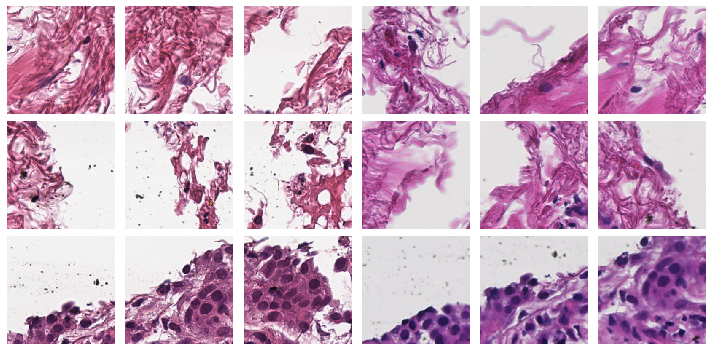

In [108]:
path1 = "output/MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01/MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01_tiles/"
path2 = "output/wsi2/wsi2_tiles/"

tiles1 = sorted(os.listdir(path1))
tiles2 = sorted(os.listdir(path2))

f, axarr = plt.subplots(3, 6, figsize=(10,5))
for i in range(0, 3):
  for j in range(0, 3):
    image_path = path1 + tiles1[4*i + j+8]
    img = PImage.open(image_path)
    axarr[i, j].imshow(img)
    axarr[i, j].set_axis_off()
f.tight_layout()

for i in range(0, 3):
  for j in range(0, 3):
    image_path = path2 + tiles2[4*i + j+3]
    img = PImage.open(image_path)
    axarr[i, j+3].imshow(img)
    axarr[i, j+3].set_axis_off()
f.tight_layout()

In [102]:
tiles1[4*i + j+8]

'MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01_02212.png'

In [ ]:
tiles2[4*i + j+3]

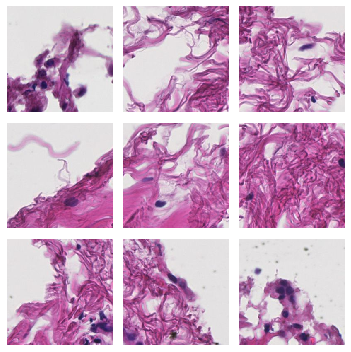

In [85]:
f, axarr = plt.subplots(3, 3, figsize=(5,5))
for i in range(0, 3):
  for j in range(0, 3):
    image_path = path2 + tiles2[4*i + j]
    img = PImage.open(image_path)
    axarr[i, j].imshow(img)
    axarr[i, j].set_axis_off()
f.tight_layout()

In [58]:
!pwd

/mnt/3TB/Projects/pathology_gan/data/mai_mini
